In [1639]:
import tensorflow as tf
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import csv
import os


In [1640]:
Stock_ID='2357'
count=0
delete=0
f = open('TSE1.csv', 'r')
if os.path.exists('2357.csv')==False:
    for row in csv.reader(f):
        if(row[1]==Stock_ID or row[1]=='證券代號'):            
            if os.path.exists('2357.csv')==False:
                out= open('2357.csv','w',newline='')
            else:
                out= open('2357.csv','a',newline='')
            csv_write=csv.writer(out,dialect='excel')
            if(row[6]!='--'):
                print(row)
                csv_write.writerow(row)
                count=count+1
            else:
                delete=delete+1
    print(count,delete)
f.close()


['日期', '證券代號', '證券名稱', '成交股數', '成交筆數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌(+/-)', '漲跌價差', '最後揭示買價', '最後揭示買量', '最後揭示賣價', '最後揭示賣量', '本益比']
['20130102', '2357', '華碩', '1418968', '1168', '464615504', '328', '329', '324.5', '328.5', '+', '2', '328.5', '14', '329', '43', '11.55']
['20130103', '2357', '華碩', '3469317', '2171', '1131689842', '325.5', '329', '325', '326.5', '-', '2', '326', '1', '326.5', '223', '11.48']
['20130104', '2357', '華碩', '4756383', '3203', '1519978342', '326', '326', '316.5', '319.5', '-', '7', '319', '5', '319.5', '27', '11.23']
['20130107', '2357', '華碩', '2447346', '1777', '779712427', '317.5', '319.5', '317.5', '319', '-', '0.5', '318.5', '8', '319', '15', '11.21']
['20130108', '2357', '華碩', '3360286', '2337', '1083742930', '324', '325', '319.5', '325', '+', '6', '323.5', '1', '325', '59', '11.42']
['20130109', '2357', '華碩', '5621624', '2681', '1806097124', '325.5', '326', '318.5', '321', '-', '4', '321', '76', '321.5', '2', '11.28']
['20130110', '2357', '華碩', '7

['20130410', '2357', '華碩', '4562541', '2874', '1551551981', '340', '343.5', '339', '341', '+', '1', '340.5', '167', '341', '1', '11.45']
['20130411', '2357', '華碩', '4185888', '2354', '1442947852', '345', '346.5', '342.5', '344', '+', '3', '344', '56', '344.5', '94', '11.55']
['20130412', '2357', '華碩', '9590366', '6202', '3144771468', '340', '340', '320.5', '325', '-', '19', '324', '9', '325', '151', '10.91']
['20130415', '2357', '華碩', '11099318', '6474', '3441749716', '318.5', '318.5', '304.5', '310', '-', '15', '310', '475', '310.5', '31', '10.41']
['20130416', '2357', '華碩', '7132877', '4242', '2257160394', '306', '324', '306', '322', '+', '12', '322', '12', '322.5', '4', '10.81']
['20130417', '2357', '華碩', '6793519', '4649', '2222388694', '328', '331', '324', '326', '+', '4', '326', '6', '326.5', '23', '10.94']
['20130418', '2357', '華碩', '4254606', '3147', '1377971344', '321', '326.5', '320', '324', '-', '2', '323.5', '38', '324', '16', '10.88']
['20130419', '2357', '華碩', '3969955', 

['20130710', '2357', '華碩', '5685002', '3497', '1485226524', '261', '262', '258.5', '262', '+', '1', '261.5', '5', '262', '380', '8.4']
['20130711', '2357', '華碩', '8843196', '5016', '2323144244', '264', '264', '261', '262.5', '+', '0.5', '262.5', '107', '263', '208', '8.42']
['20130712', '2357', '華碩', '5746000', '3683', '1516956000', '262.5', '269', '259', '269', '+', '6.5', '268', '35', '269', '183', '8.63']
['20130715', '2357', '華碩', '5271708', '3527', '1429576284', '268', '273', '267', '273', '+', '4', '272.5', '28', '273', '73', '8.76']
['20130716', '2357', '華碩', '6517054', '4433', '1800505012', '276', '279', '273', '277.5', '+', '4.5', '277', '14', '277.5', '11', '8.9']
['20130717', '2357', '華碩', '5675507', '3715', '1548730134', '277.5', '277.5', '270.5', '272.5', '-', '5', '272.5', '11', '273', '19', '8.74']
['20130718', '2357', '華碩', '6634633', '4237', '1762539745', '270', '270.5', '262.5', '264', '-', '8.5', '264', '49', '265', '3', '8.47']
['20130719', '2357', '華碩', '6019635', 

['20131007', '2357', '華碩', '2188614', '1676', '508174500', '234', '234', '230.5', '230.5', '-', '4', '230.5', '40', '231', '18', '7.41']
['20131008', '2357', '華碩', '1817903', '1345', '423100837', '233', '235', '230.5', '235', '+', '4.5', '234.5', '1', '235', '27', '7.55']
['20131009', '2357', '華碩', '1925676', '1514', '447484832', '233', '234.5', '231.5', '231.5', '-', '3.5', '231.5', '39', '232', '78', '7.44']
['20131011', '2357', '華碩', '6896092', '4842', '1569867608', '234.5', '235.5', '220', '222', '-', '9.5', '222', '39', '222.5', '71', '7.14']
['20131014', '2357', '華碩', '13983200', '8015', '2951157000', '220', '220', '206.5', '209', '-', '13', '208.5', '39', '209', '98', '6.72']
['20131015', '2357', '華碩', '8401481', '4831', '1749536261', '209', '211', '204', '211', '+', '2', '210.5', '8', '211', '51', '6.78']
['20131016', '2357', '華碩', '2318304', '1776', '485908840', '211.5', '211.5', '208', '209', '-', '2', '209', '53', '209.5', '14', '6.72']
['20131017', '2357', '華碩', '6748416', 

['20140103', '2357', '華碩', '2869844', '1505', '772672880', '269', '270.5', '267', '270', ' ', '0', '270', '127', '270.5', '31', '9.27']
['20140106', '2357', '華碩', '2063517', '1290', '556672073', '272', '272.5', '268.5', '268.5', '-', '1.5', '268.5', '33', '269', '4', '9.21']
['20140107', '2357', '華碩', '2705251', '1711', '733045470', '270', '273', '269', '270', '+', '1.5', '270', '72', '270.5', '1', '9.27']
['20140108', '2357', '華碩', '7089097', '5033', '1966756063', '273', '281', '272.5', '280', '+', '10', '279.5', '8', '280', '41', '9.61']
['20140109', '2357', '華碩', '4774137', '3465', '1341337086', '280', '285', '276.5', '279', '-', '1', '279', '42', '279.5', '51', '9.57']
['20140110', '2357', '華碩', '2529227', '1898', '703388652', '279', '281.5', '275.5', '276.5', '-', '2.5', '276.5', '34', '277', '8', '9.49']
['20140113', '2357', '華碩', '6764196', '4792', '1933801307', '280', '289', '279.5', '289', '+', '12.5', '288.5', '5', '289', '2', '9.92']
['20140114', '2357', '華碩', '3839566', '26

['20140415', '2357', '華碩', '2261155', '1509', '691330021', '308', '308.5', '303.5', '303.5', '-', '2.5', '303.5', '137', '305.5', '24', '10.51']
['20140416', '2357', '華碩', '2167555', '1822', '662013775', '308', '308', '304', '305.5', '+', '2', '305', '30', '305.5', '15', '10.58']
['20140417', '2357', '華碩', '2794993', '2220', '861383344', '307', '310', '305.5', '310', '+', '4.5', '309.5', '20', '310', '166', '10.73']
['20140418', '2357', '華碩', '2557723', '1904', '796893957', '310', '313.5', '307.5', '312', '+', '2', '312', '5', '312.5', '104', '10.8']
['20140421', '2357', '華碩', '1656372', '1309', '516538564', '313', '314', '308.5', '313.5', '+', '1.5', '313.5', '17', '314', '107', '10.86']
['20140422', '2357', '華碩', '5368850', '3997', '1738592600', '316', '329', '316', '327.5', '+', '14', '327', '44', '327.5', '31', '11.34']
['20140423', '2357', '華碩', '5367340', '4004', '1771416540', '329', '333', '326', '333', '+', '5.5', '332.5', '48', '333', '103', '11.53']
['20140424', '2357', '華碩',

['20140714', '2357', '華碩', '1485318', '1351', '484615668', '330', '330', '325', '326', '-', '2.5', '326', '5', '326.5', '1', '12.26']
['20140715', '2357', '華碩', '1358142', '1056', '446194434', '328', '330', '327', '327', '+', '1', '327', '45', '327.5', '1', '12.29']
['20140716', '2357', '華碩', '1290267', '1130', '422836809', '327', '329.5', '326.5', '327.5', '+', '0.5', '327.5', '1', '328', '62', '12.31']
['20140717', '2357', '華碩', '2346673', '1662', '754066845', '327.5', '329.5', '313', '321.5', '-', '6', '321', '29', '321.5', '26', '12.09']
['20140718', '2357', '華碩', '2020681', '1323', '651812963', '320', '326', '319.5', '323', '+', '1.5', '323', '2', '323.5', '1', '12.14']
['20140721', '2357', '華碩', '2294486', '1307', '748846662', '324', '328', '323', '327', '+', '4', '326.5', '1', '327', '146', '12.29']
['20140722', '2357', '華碩', '2026369', '1275', '664642401', '327.5', '330', '325', '329.5', '+', '2.5', '328', '4', '329.5', '102', '12.39']
['20140724', '2357', '華碩', '2550940', '138

['20141014', '2357', '華碩', '3372797', '2465', '1013829194', '295', '303', '295', '302', '+', '7', '300', '1', '302', '24', '11.34']
['20141015', '2357', '華碩', '3465326', '2567', '1020927003', '300', '300', '292', '292', '-', '10', '292', '155', '293.5', '2', '10.97']
['20141016', '2357', '華碩', '3553835', '2430', '1040704490', '289', '296.5', '288', '293.5', '+', '1.5', '293', '15', '293.5', '11', '11.02']
['20141017', '2357', '華碩', '3320495', '2383', '967605540', '293.5', '294', '289.5', '291.5', '-', '2', '291.5', '6', '292', '5', '10.95']
['20141020', '2357', '華碩', '1475165', '1275', '433717680', '293', '296.5', '292', '292', '+', '0.5', '292', '108', '292.5', '3', '10.97']
['20141021', '2357', '華碩', '2141124', '1672', '631281204', '293', '296', '293', '296', '+', '4', '295', '1', '296', '114', '11.12']
['20141022', '2357', '華碩', '2675271', '1974', '790579068', '297', '297', '294.5', '295.5', '-', '0.5', '295', '107', '296', '66', '11.1']
['20141023', '2357', '華碩', '1698062', '1005',

['20150109', '2357', '華碩', '2613131', '2123', '913383433', '351', '359', '343', '343', '-', '5', '343', '22', '343.5', '4', '12.33']
['20150112', '2357', '華碩', '3662876', '2645', '1230777460', '338', '343', '333', '333', '-', '10', '333', '206', '335', '1', '11.97']
['20150113', '2357', '華碩', '2357820', '1968', '786130560', '330', '335.5', '328.5', '333', ' ', '0', '333', '14', '333.5', '1', '11.97']
['20150114', '2357', '華碩', '8832619', '5784', '2844416461', '330', '330', '317', '317', '-', '16', '317', '56', '317.5', '2', '11.4']
['20150115', '2357', '華碩', '6237924', '3794', '1970771432', '316', '319', '313', '315', '-', '2', '315', '257', '315.5', '2', '11.33']
['20150116', '2357', '華碩', '3393001', '2715', '1072554316', '315.5', '318.5', '313', '316', '+', '1', '316', '91', '317', '6', '11.36']
['20150119', '2357', '華碩', '1559887', '1343', '494369292', '316', '318.5', '315', '315', '-', '1', '315', '43', '316', '3', '11.33']
['20150120', '2357', '華碩', '2275963', '1784', '724771197',

['20150420', '2357', '華碩', '3735128', '832', '1198445272', '321', '323', '319', '319', '-', '2.5', '319', '72', '319.5', '1', '12.17']
['20150421', '2357', '華碩', '1476987', '1166', '473686353', '319.5', '323', '319', '319', ' ', '0', '319', '253', '320', '9', '12.17']
['20150422', '2357', '華碩', '3758584', '2929', '1233939720', '320.5', '332.5', '320.5', '331.5', '+', '12.5', '331', '1', '331.5', '37', '12.65']
['20150423', '2357', '華碩', '3131835', '2482', '1045601555', '331.5', '337', '329', '335', '+', '3.5', '335', '11', '335.5', '2', '12.78']
['20150424', '2357', '華碩', '2789172', '2203', '937840005', '337', '340', '331.5', '337', '+', '2', '336.5', '4', '337', '2', '12.86']
['20150427', '2357', '華碩', '1800027', '1366', '608666050', '337', '339', '337', '338.5', '+', '1.5', '338.5', '4', '339', '146', '12.91']
['20150428', '2357', '華碩', '3521954', '2513', '1199088314', '339', '343', '337.5', '343', '+', '4.5', '342.5', '2', '343', '74', '13.09']
['20150429', '2357', '華碩', '2405385', 

['20150721', '2357', '華碩', '2178773', '1771', '616196078', '285', '286.5', '278', '286', '+', '1', '284.5', '3', '286', '28', '11.3']
['20150722', '2357', '華碩', '1702201', '1322', '483681878', '280', '287', '280', '287', '+', '1', '285.5', '3', '287', '47', '11.34']
['20150723', '2357', '華碩', '1995251', '1325', '569092535', '287', '287.5', '284', '285', '-', '2', '285', '2', '285.5', '5', '11.26']
['20150724', '2357', '華碩', '1942474', '1402', '563009960', '287', '292', '285', '292', '+', '7', '291', '39', '292', '36', '11.54']
['20150727', '2357', '華碩', '2725073', '1943', '793958024', '290', '294', '288', '289.5', '-', '2.5', '289.5', '3', '290', '49', '11.44']
['20150728', '2357', '華碩', '3858071', '2647', '1095581664', '285', '289.5', '282', '285', '-', '4.5', '285', '15', '286', '5', '11.26']
['20150729', '2357', '華碩', '3847047', '2658', '1074147519', '285', '287.5', '275', '276', '-', '9', '276', '147', '276.5', '1', '10.91']
['20150730', '2357', '華碩', '2574891', '2170', '736559608'

['20151016', '2357', '華碩', '1775850', '1277', '523249814', '297', '297.5', '291.5', '295', '-', '4', '295', '108', '296', '61', '11.74']
['20151019', '2357', '華碩', '1997363', '1049', '590486948', '296', '298', '294', '298', '+', '3', '296.5', '48', '298', '31', '11.86']
['20151020', '2357', '華碩', '1180642', '1041', '348807703', '298', '298', '294', '296.5', '-', '1.5', '296.5', '3', '297', '31', '11.8']
['20151021', '2357', '華碩', '804106', '622', '238598064', '297.5', '298.5', '295', '297', '+', '0.5', '297', '35', '297.5', '16', '11.82']
['20151022', '2357', '華碩', '1370030', '1024', '409857943', '298', '300', '297', '299.5', '+', '2.5', '299', '62', '299.5', '133', '11.92']
['20151023', '2357', '華碩', '2657721', '2015', '806741242', '302', '306', '299.5', '303.5', '+', '4', '303', '51', '303.5', '208', '12.08']
['20151026', '2357', '華碩', '1774145', '1210', '543045783', '306', '309.5', '304', '307', '+', '3.5', '305', '6', '307', '29', '12.22']
['20151027', '2357', '華碩', '1302273', '103

['20160112', '2357', '華碩', '1521476', '1097', '415498231', '276', '276.5', '271', '274', '-', '1.5', '272.5', '78', '274', '51', '11.93']
['20160113', '2357', '華碩', '1349116', '915', '368306168', '275', '275', '271', '274.5', '+', '0.5', '274', '25', '274.5', '17', '11.95']
['20160114', '2357', '華碩', '1643294', '947', '445271262', '269', '274.5', '266', '274.5', ' ', '0', '272.5', '1', '274.5', '25', '11.95']
['20160115', '2357', '華碩', '2686277', '1303', '736951121', '272', '277.5', '269.5', '277.5', '+', '3', '274.5', '60', '277.5', '7', '12.08']
['20160118', '2357', '華碩', '1707616', '1433', '463702936', '272', '275', '269', '270.5', '-', '7', '270.5', '184', '271', '1', '11.78']
['20160119', '2357', '華碩', '992950', '769', '268916969', '270.5', '273.5', '269.5', '270.5', ' ', '0', '270.5', '37', '271', '1', '11.78']
['20160120', '2357', '華碩', '1996038', '1459', '530181608', '267', '268', '263.5', '263.5', '-', '7', '263.5', '142', '264', '11', '11.47']
['20160121', '2357', '華碩', '1118

['20160419', '2357', '華碩', '1193505', '973', '340463925', '286.5', '286.5', '282.5', '286', '+', '0.5', '286', '17', '286.5', '22', '12.42']
['20160420', '2357', '華碩', '1977655', '1526', '568437994', '288', '290', '285.5', '287', '+', '1', '286.5', '70', '287', '21', '12.47']
['20160421', '2357', '華碩', '1205783', '1081', '342530089', '283', '286.5', '282.5', '284', '-', '3', '284', '45', '284.5', '25', '12.34']
['20160422', '2357', '華碩', '1045951', '880', '299796486', '286', '287.5', '286', '287.5', '+', '3.5', '286.5', '339', '287.5', '17', '12.49']
['20160425', '2357', '華碩', '1161573', '655', '334044878', '288', '288', '286', '287.5', ' ', '0', '287.5', '5', '288', '223', '12.49']
['20160426', '2357', '華碩', '1508470', '802', '434004647', '286', '288', '286', '288', '+', '0.5', '288', '143', '288.5', '50', '12.51']
['20160427', '2357', '華碩', '1228136', '714', '353214455', '288', '288.5', '287', '287.5', '-', '0.5', '287', '82', '287.5', '15', '12.49']
['20160428', '2357', '華碩', '89725

['20160719', '2357', '華碩', '1841424', '1285', '523840742', '285.5', '286', '283.5', '284.5', '-', '0.5', '284', '41', '284.5', '128', '12.02']
['20160720', '2357', '華碩', '2089361', '1510', '592461115', '284', '285', '282', '283', '-', '1.5', '283', '160', '283.5', '149', '11.96']
['20160721', '2357', '華碩', '2978530', '2477', '833681310', '280.5', '284', '276.5', '277', '-', '6', '276.5', '65', '277', '46', '11.7']
['20160722', '2357', '華碩', '1586627', '1337', '441630806', '277', '279.5', '277', '279.5', '+', '2.5', '279.5', '9', '280', '41', '11.81']
['20160725', '2357', '華碩', '971061', '772', '271643519', '281', '282.5', '277.5', '280.5', '+', '1', '280', '1', '280.5', '25', '11.85']
['20160726', '2357', '華碩', '894489', '795', '249416431', '277.5', '280', '277', '279.5', '-', '1', '279', '6', '279.5', '17', '11.81']
['20160727', '2357', '華碩', '943155', '519', '264760827', '279.5', '281.5', '279.5', '281', '+', '1.5', '280', '42', '281.5', '52', '11.87']
['20160728', '2357', '華碩', '104

['20161020', '2357', '華碩', '1394982', '537', '392237242', '281', '282', '280', '282', '+', '2', '281.5', '11', '282', '75', '12.29']
['20161021', '2357', '華碩', '422507', '310', '118064693', '282', '282', '278', '279.5', '-', '2.5', '279.5', '36', '280', '5', '12.18']
['20161024', '2357', '華碩', '304515', '264', '85327185', '280', '281', '279.5', '280.5', '+', '1', '280', '36', '280.5', '18', '12.22']
['20161025', '2357', '華碩', '998171', '889', '278917612', '280.5', '281', '277', '280', '-', '0.5', '280', '14', '280.5', '34', '12.2']
['20161026', '2357', '華碩', '1175578', '588', '331250158', '280', '283', '280', '281.5', '+', '1.5', '281.5', '9', '282', '166', '12.27']
['20161027', '2357', '華碩', '1965404', '698', '552550714', '281.5', '282.5', '279', '281', '-', '0.5', '281', '68', '281.5', '2', '12.24']
['20161028', '2357', '華碩', '588987', '435', '164172884', '277.5', '280', '277.5', '278', '-', '3', '278', '47', '278.5', '3', '12.11']
['20161031', '2357', '華碩', '1240580', '919', '343651

['20170117', '2357', '華碩', '354718', '295', '97321867', '274.5', '275.5', '273.5', '275', ' ', '0', '274', '10', '275', '93', '10.86']
['20170118', '2357', '華碩', '633315', '547', '173469180', '273', '275.5', '272', '272', '-', '3', '272', '79', '273', '2', '10.74']
['20170119', '2357', '華碩', '893078', '704', '241666060', '272', '273', '268', '271', '-', '1', '271', '5', '271.5', '30', '10.7']
['20170120', '2357', '華碩', '576099', '515', '157418970', '271', '274.5', '270.5', '273.5', '+', '2.5', '273', '3', '273.5', '8', '10.8']
['20170123', '2357', '華碩', '869759', '648', '240112225', '275', '277', '275', '277', '+', '3.5', '276', '1', '277', '137', '10.94']
['20170124', '2357', '華碩', '810113', '639', '222483736', '275', '277', '273', '273', '-', '4', '273', '61', '273.5', '3', '10.78']
['20170202', '2357', '華碩', '1765566', '1388', '477039532', '271', '277', '268', '269', '-', '4', '269', '31', '270', '23', '10.62']
['20170203', '2357', '華碩', '1462051', '1138', '389513027', '269', '271',

['20170425', '2357', '華碩', '2152554', '1599', '647401700', '300', '302', '298.5', '302', '+', '8.5', '301', '3', '302', '121', '11.68']
['20170426', '2357', '華碩', '1622813', '1157', '487142167', '302', '302.5', '297', '300', '-', '2', '299', '13', '300', '291', '11.61']
['20170427', '2357', '華碩', '761737', '641', '226061915', '297', '299', '294.5', '296.5', '-', '3.5', '296.5', '19', '297.5', '8', '11.47']
['20170428', '2357', '華碩', '696544', '557', '206507980', '298', '298.5', '294.5', '296.5', ' ', '0', '296.5', '26', '297', '1', '11.47']
['20170502', '2357', '華碩', '1367852', '1208', '411867600', '299', '302', '299', '302', '+', '5.5', '301.5', '28', '302', '47', '11.68']
['20170503', '2357', '華碩', '803988', '743', '241307407', '302', '302', '298', '300.5', '-', '1.5', '299.5', '45', '300.5', '1', '11.62']
['20170504', '2357', '華碩', '687644', '567', '206512056', '301.5', '303', '298.5', '300.5', ' ', '0', '300.5', '17', '301', '2', '11.62']
['20170505', '2357', '華碩', '812403', '715',

['20170724', '2357', '華碩', '2379500', '1832', '670085229', '283.5', '283.5', '279.5', '282.5', '-', '2.5', '282', '13', '282.5', '1', '11.22']
['20170725', '2357', '華碩', '1853069', '1536', '520965406', '280.5', '282.5', '280', '281.5', '-', '1', '281.5', '29', '282', '2', '11.18']
['20170726', '2357', '華碩', '1403184', '1321', '394591097', '281', '282.5', '280', '281', '-', '0.5', '281', '73', '281.5', '11', '11.16']
['20170727', '2357', '華碩', '971047', '806', '274219754', '281', '284', '280.5', '282', '+', '1', '282', '36', '282.5', '5', '11.2']
['20170728', '2357', '華碩', '773010', '660', '217845810', '282', '283', '281', '281', '-', '1', '281', '103', '281.5', '1', '11.16']
['20170731', '2357', '華碩', '1566701', '904', '440400691', '281', '283', '280', '281', ' ', '0', '280.5', '35', '281', '16', '11.16']
['20170801', '2357', '華碩', '1441332', '927', '408088774', '282', '284', '282', '283', '+', '2', '282.5', '58', '283', '32', '11.24']
['20170802', '2357', '華碩', '1222197', '1064', '347

In [1641]:
menu= pd.read_csv("2357.csv",encoding = "cp950")
menu.tail()


,日期,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
1128,20170810,2357,華碩,1871869,1160,492321547,265.0,265.5,262.0,263.0,-,2.5,263,119,263.5,82,10.45
1129,20170811,2357,華碩,2184221,1400,568245123,262.0,263.0,258.0,258.0,-,5.0,258,301,258.5,15,10.25
1130,20170814,2357,華碩,4340914,2811,1070340672,243.5,251.0,243.5,246.0,-,12.0,245.5,6,246.0,174,11.02
1131,20170815,2357,華碩,2454057,1556,606260592,249.0,252.0,245.0,245.0,-,1.0,245,129,245.5,3,10.98
1132,20170816,2357,華碩,1762839,1402,430770555,245.0,247.0,242.5,244.0,-,1.0,244,74,244.5,14,10.93


In [1642]:
menu.shape

(1133, 17)

In [1643]:
data=pd.concat([menu['開盤價'],menu['最高價'],menu['最低價'],menu['收盤價'],menu['成交股數']],axis=1)
data.head()

,開盤價,最高價,最低價,收盤價,成交股數
0,328.0,329.0,324.5,328.5,1418968
1,325.5,329.0,325.0,326.5,3469317
2,326.0,326.0,316.5,319.5,4756383
3,317.5,319.5,317.5,319.0,2447346
4,324.0,325.0,319.5,325.0,3360286


In [1644]:
data.shape

(1133, 5)

## Inputs Data

In [1645]:
def modified(dataset):
    numlist=[]
    for i in range(len(dataset)):
        if (i+1)<len(dataset):
            #print(type(dataset[i]))
            ave= (dataset[i+1]-dataset[i])/dataset[i]
            #print(type(ave))
            numlist.append(ave)
    numlist=np.array(numlist,dtype='float32')
    return numlist


In [1646]:
def difference(dataset):
    numlist=[]
    dataset=np.array(dataset)
    for i in range(len(dataset)):
        if(i+1)<len(dataset):
            dif= dataset[i+1]-dataset[i]
            #print(dataset[i+1], dataset[i], dif)
            numlist.append(dif)
    numlist=np.array(numlist, dtype='float32')
    return numlist


In [1647]:
def create_dataset(dataset, look_back=1):

    dataX = []
    
    for i in range(len(dataset)-look_back+1):
            dataX.append(dataset[i:(i+look_back),:])

    return np.array(dataX)

In [1648]:
def markupdown(dataset):
    ar=[]
    for i in range (len(dataset)):
        if dataset[i]<0:
            ar.append([1,0])
        else:
            ar.append([0,1])
        #print('ar= ',ar)
    return np.array(ar)

In [1649]:
def v_modified (array,num):
    #print(array)
    arr=[]
    maxi=np.amax(array)
    #print(maxi)
    for i in range (num):
        #print(array[i],maxi,array[i]/maxi)
        arr.append(array[i]/maxi)
    arr=np.array(arr)
    #print(arr)
    return arr

In [1650]:
look_back=5
col=5

### Data X Y

In [1651]:
x=pd.concat([menu['開盤價'],menu['最高價'],menu['最低價'],menu['收盤價']],axis=1)
x=np.array(x)
#x=x.astype('float')
#x=np.fromstring(x, dtype=float, sep=' ')
#print(x)

x=modified(x)
print(x[0:5], x.shape)

[[-0.00762195  0.          0.00154083 -0.00608828]
 [ 0.0015361  -0.00911854 -0.02615385 -0.02143951]
 [-0.02607362 -0.01993865  0.00315956 -0.00156495]
 [ 0.02047244  0.0172144   0.00629921  0.01880878]
 [ 0.00462963  0.00307692 -0.00312989 -0.01230769]] (1132, 4)


In [1652]:
volume=pd.concat([menu['成交股數']],axis=1)
days=20
#print(volume.shape)
vol_data=[]
for i in range(0,len(volume),days):
    if (i+20)<len(volume):
        array=np.array(volume[i:i+days])
        num=days
    else:
        array=np.array(volume[i:len(volume)])
        num=len(volume)-i

    vol=v_modified(array,num)  #average of these days
    vol_data=np.array(vol_data)
    vol_data=np.append(vol_data,vol)

vol_data=np.reshape(vol_data, (len(vol_data),1))
vol_data=vol_data[1:len(vol_data)]
print(vol_data.shape)

(1132, 1)


In [1653]:
x=np.append(x,vol_data,axis=1)
x_data =create_dataset(x,look_back)
print(x_data[0:5],x_data.shape)

[[[-0.00762195  0.          0.00154083 -0.00608828  0.46590102]
  [ 0.0015361  -0.00911854 -0.02615385 -0.02143951  0.6387435 ]
  [-0.02607362 -0.01993865  0.00315956 -0.00156495  0.32865863]
  [ 0.02047244  0.0172144   0.00629921  0.01880878  0.45125904]
  [ 0.00462963  0.00307692 -0.00312989 -0.01230769  0.75493831]]

 [[ 0.0015361  -0.00911854 -0.02615385 -0.02143951  0.6387435 ]
  [-0.02607362 -0.01993865  0.00315956 -0.00156495  0.32865863]
  [ 0.02047244  0.0172144   0.00629921  0.01880878  0.45125904]
  [ 0.00462963  0.00307692 -0.00312989 -0.01230769  0.75493831]
  [-0.0030722   0.02147239  0.01255887  0.03738318  1.        ]]

 [[-0.02607362 -0.01993865  0.00315956 -0.00156495  0.32865863]
  [ 0.02047244  0.0172144   0.00629921  0.01880878  0.45125904]
  [ 0.00462963  0.00307692 -0.00312989 -0.01230769  0.75493831]
  [-0.0030722   0.02147239  0.01255887  0.03738318  1.        ]
  [ 0.01848998  0.01201201  0.01085271  0.00600601  0.72947268]]

 [[ 0.02047244  0.0172144   0.0062

In [1654]:
scaler = MinMaxScaler(feature_range=(0,1))
x= scaler.fit_transform(x)
#x=preprocessing.normalize(x,norm='l2')


In [1655]:
y=pd.concat([menu['收盤價']],axis=1)
y=y.values
y=difference(y)
y_data= markupdown(y)
#print(y[0:6])
print(y_data[0:5],y_data.shape)

[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]] (1132, 2)


### Data Split

In [1656]:
train_size= int(len(x_data)*0.8)
test_size= len(x_data)-train_size

In [1657]:
x_train,x_test= x_data[0:train_size,:],x_data[train_size:len(x_data),:]
x_test=x_test[0:len(x_test)-1]

In [1658]:
print(x_train.shape, x_test.shape)

(902, 5, 5) (225, 5, 5)


In [1659]:
x_train=np.reshape(x_train, (-1, look_back*col))
x_test=np.reshape(x_test,(-1, look_back*col))
#scaler = MinMaxScaler(feature_range=(0,1))
#x_train= scaler.fit_transform(x_train)
#x_test= scaler.fit_transform(x_test)
print(x_train.shape, x_test.shape)

(902, 25) (225, 25)


In [1660]:
y_data=y_data[look_back:,:]
y_train,y_test= y_data[0:train_size,:],y_data[train_size:len(y_data),:]

In [1661]:
print(y_train.shape, y_test.shape)

(902, 2) (225, 2)


## Train Model

In [1662]:
def layer(output_dim,input_dim,inputs,activation):
    w=tf.Variable(tf.random_normal([input_dim,output_dim]))
    b=tf.Variable(tf.random_normal([1,output_dim]))
    xwb=tf.matmul(inputs,w)+b
    if activation is None:
        outputs=xwb
    else:
        outputs=activation(xwb)
    return outputs

In [1663]:
x=tf.placeholder("float",[None,look_back*col])
h1=layer(output_dim=40, input_dim=look_back*col, inputs=x, activation=tf.nn.relu)
#h2=layer(output_dim=10, input_dim=80, inputs=h1,activation=tf.nn.relu)
y_predict=layer(output_dim=2, input_dim=40, inputs=h1, activation=None)

In [1664]:
y_label=tf.placeholder("float",[None,2])
loss_fun=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_predict, labels=y_label))
optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_fun)

In [1665]:
correct_predict=tf.equal(tf.argmax(y_label,1),tf.argmax(y_predict,1))
accuracy= tf.reduce_mean(tf.cast(correct_predict,"float"))

## Training

In [1666]:
trainEpochs=500
batchsize=100
totalbatchs= int(len(x_data)//batchsize)

loss_train=[];epoch_list=[];accuracy_train=[]
loss_test=[]; accuracy_test=[]
from time import time
startTime=time()

sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [1667]:
predict=[]
for epoch in range(trainEpochs):
    shuffle = np.random.permutation(len(y_train)-1)
    x_train = x_train[shuffle]
    y_train = y_train[shuffle]
    for i in range(totalbatchs):
        sess.run(optimizer,feed_dict={x:x_train,y_label:y_train})
        
    
    loss_tra,acc_tra= sess.run([loss_fun, accuracy],feed_dict={x:x_train,y_label:y_train})
    loss_t,acc_t= sess.run([loss_fun, accuracy],feed_dict={x:x_test,y_label:y_test})
    

    epoch_list.append(epoch);
    loss_test.append(loss_t)
    loss_train.append(loss_tra)
    accuracy_test.append(acc_t)
    accuracy_train.append(acc_tra)
    
    #print ("Train Epoch:",'%02d'%(epoch+1),"Loss=","{:.9f}".format(loss),"Accuracy=",acc)

duration=time()-startTime

print("Loss_train= ",loss_tra)
print ("Loss_test= ",loss_t)

print("Accuracy_train= ", acc_tra)
print("Accuracy_test= ", acc_t)

print("Train Finished takes:",duration)

Loss_train=  0.467189
Loss_test=  0.753359
Accuracy_train=  0.808458
Accuracy_test=  0.542222
Train Finished takes: 35.08713746070862


## Plot

In [1668]:
%matplotlib inline
import matplotlib.pyplot as plt

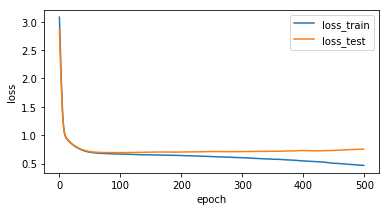

In [1669]:
fig=plt.gcf()
fig.set_size_inches(6,3)
plt.plot(epoch_list,loss_train, label='loss_train')
plt.plot(epoch_list,loss_test, label='loss_test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

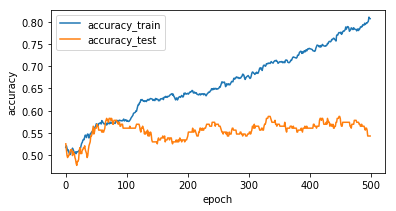

In [1670]:
fig=plt.gcf()
fig.set_size_inches(6,3)
plt.plot(epoch_list,accuracy_train, label='accuracy_train')
plt.plot(epoch_list,accuracy_test, label='accuracy_test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()